# Quality Assessment Examples

## Package loading and basic configurations

In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig, Preprocessing, Visualiser

# create an initial but optional config and an api client
config = ECConfig()
preprocessing = Preprocessing()
visualiser = Visualiser()
track_api = TrackAPI(api_client=DownloadClient(config=config))

Initializing pre-processing class
Initializing visualisation class


## Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 10 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column.

In [2]:
bbox = BboxSelector([
    7.554130554199218, # min_x
    51.95590322041212, # min_y
    7.590351104736328, # max_x
    51.97874790276371  # max_y
])


# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=10) # requesting 10 tracks inside the bbox

Visialising the CO2 values to see if there are any outliers. These measurements were taken as an example because there is indeed an outlier, as can be seen on the plots.

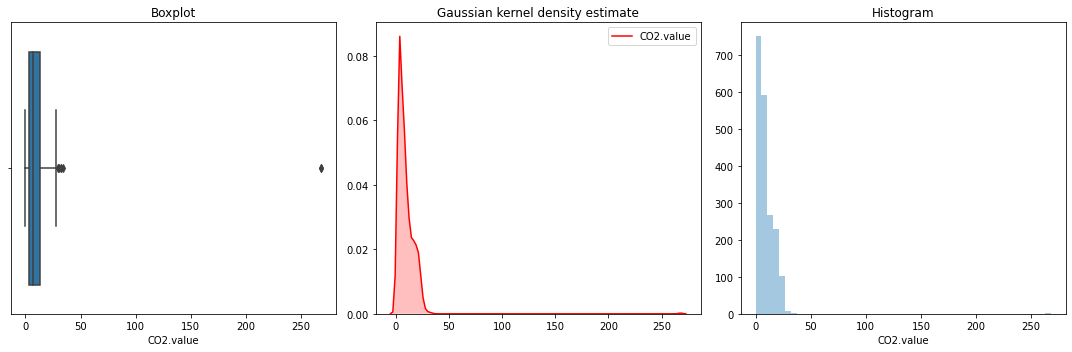

In [3]:

visualiser.plot_distribution(track_df, 'CO2.value')

Removing the outliers and plotting the result with the same function.

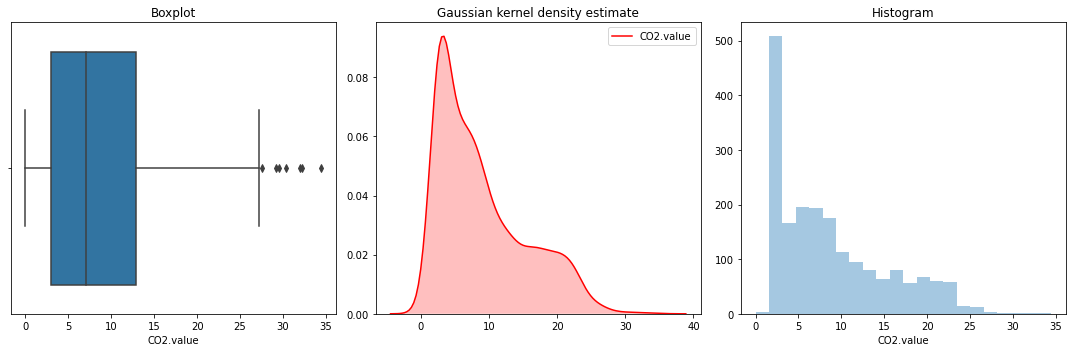

In [4]:
track_df = preprocessing.remove_outliers(track_df, 'CO2.value')
visualiser.plot_distribution(track_df, 'CO2.value')

Plotting the values on the map to see how they are distributed spatially.

In [5]:
visualiser.plot_point_values(track_df, "CO2.value")

It is also possible to see if there is any correlation between all of the columns that contain measurements. The function takes all columns that contain ".value" in their name and checks for correlation, visualising the result.

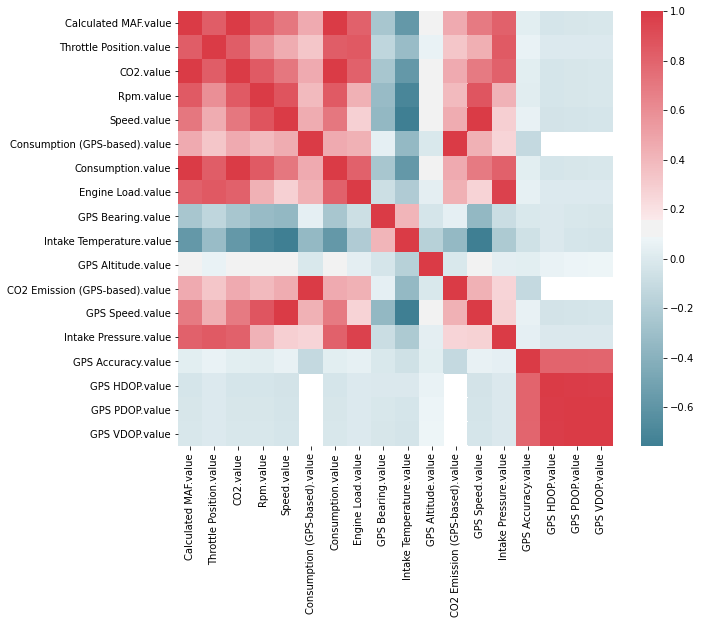

In [6]:
visualiser.plot_full_correlation(track_df)

If then more analysis of a pairwise relationship is of interest, the following function shows their relation, as well as the univariate distribution of the data in both columns. The points can be coloured by their track id or temperature.

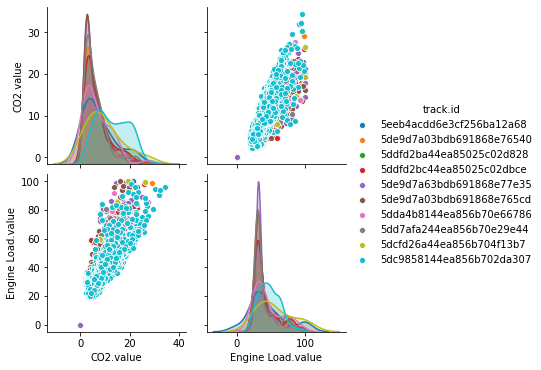

In [7]:
visualiser.plot_pair_correlation(track_df, "CO2.value", "Engine Load.value", 'id', False)

Alternatively, the data can be plotted once, while also fitting a regression model. Here, again. coloured by the track id.

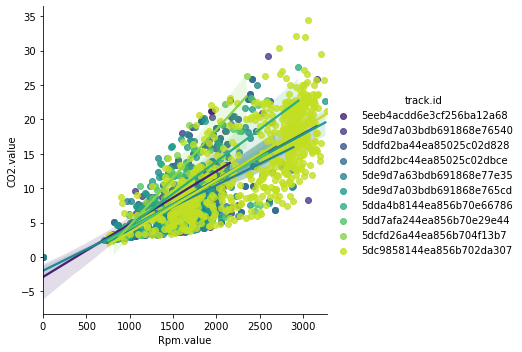

In [8]:
visualiser.plot_pair_correlation(track_df, "Rpm.value", "CO2.value", "id", True)

It is also possible to take a part of the track, for istance the first 300 seconds to see whether the intake temperature influence the consumption level at different speeds at the beginning of driving - while the motor is still cold. As seen on the data - not really.

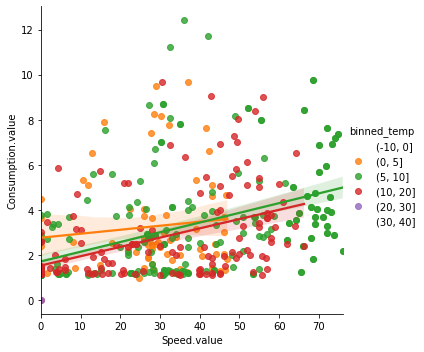

In [9]:
beginning_drive = preprocessing.split_by_time(track_df, 0, 300)
beginning_drive = preprocessing.calculateAcceleration(beginning_drive)

visualiser.plot_pair_correlation(beginning_drive, "Speed.value", "Consumption.value", "temperature", True)